In [26]:
PROVIDE_OWN_INPUT = False

In [27]:
from google.colab import files
files.upload()

Saving dataset7.csv to dataset7.csv


{'dataset7.csv': b'Company,Net Sales,Cons PAT,CFO,CFO/PAT,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Dividend Pay Out Ratio(%),Free Float,5 YR Sales CAGR,5 YR PAT CAGR,Ev/EBITDA,M/Sales\r\n3I Infotech Ltd.,1125.58,-548.96,199.06,-0.36,9.65,-49.02,0,-17.58,0.58,-1.03,0,73.85,-0.03,-1.72,16.17,0.22\r\n3M India Ltd.,2139.6,194.76,260.9,1.34,15.93,8.76,21.69,33.53,1.53,0.01,0,11.94,0.12,0.53,42.31,5.86\r\nAavas Financiers Ltd.,190.88,32.78,-590.8,-18.02,77.6,17.17,21.48,11.96,0.15,7.1,0,0,0.54,0.67,0,0\r\nABB India Ltd.,8140.27,299.88,381.67,1.27,8.48,3.46,10.3,17.1,0.97,0.2,26.14,14.38,0.01,0.06,40.57,3.3\r\nAbbott India Ltd.,2614.5,255.25,248.68,0.97,15.69,9.65,23.93,37.55,1.39,0,29.14,19.59,0.10,0.18,24.75,4.24\r\nAccelya Solutions India Ltd.,340.98,83.02,79.97,0.96,41.58,24.35,72.76,112.58,0.98,0,80.9,18.53,0.06,0.05,11.56,4.66\r\nAegis Logistics Ltd.,2213.22,113.33,138.42,1.22,8.76,5.7,27.07,25.46,2.41,0.37,26.52,25.66,0.02,0.3,16.95,0.99\r\nAGC Networ

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
data = pd.read_csv('dataset7.csv')

In [37]:
data.head()

,Company,Net Sales,Cons PAT,CFO,CFO/PAT,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Dividend Pay Out Ratio(%),Free Float,5 YR Sales CAGR,5 YR PAT CAGR,Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,1125.58,-548.96,199.06,-0.36,9.65,-49.02,0.00,-17.58,0.58,-1.03,0.00,73.85,-0.03,-1.72,16.17,0.22
1,3M India Ltd.,2139.60,194.76,260.90,1.34,15.93,8.76,21.69,33.53,1.53,0.01,0.00,11.94,0.12,0.53,42.31,5.86
2,Aavas Financiers Ltd.,190.88,32.78,-590.80,-18.02,77.60,17.17,21.48,11.96,0.15,7.10,0.00,0.00,0.54,0.67,0.00,0.00
3,ABB India Ltd.,8140.27,299.88,381.67,1.27,8.48,3.46,10.30,17.10,0.97,0.20,26.14,14.38,0.01,0.06,40.57,3.30
4,Abbott India Ltd.,2614.50,255.25,248.68,0.97,15.69,9.65,23.93,37.55,1.39,0.00,29.14,19.59,0.10,0.18,24.75,4.24


In [38]:
test = data.iloc[:,:]

In [39]:
data = data.replace( ' -   ', np.nan)

In [40]:
data.dtypes

Company                       object
Net Sales                    float64
Cons PAT                     float64
CFO                          float64
CFO/PAT                      float64
PBIDTM (%)                   float64
PATM (%)                     float64
ROE (%)                      float64
ROCE (%)                     float64
Asset Turnover(x)            float64
Total Debt/Equity(x)         float64
Dividend Pay Out Ratio(%)    float64
Free Float                   float64
5 YR Sales CAGR              float64
5 YR PAT CAGR                float64
Ev/EBITDA                    float64
M/Sales                      float64
dtype: object

In [41]:
#data.drop(labels='Company Name', axis=1, inplace=True)

In [42]:
data.iloc[:,1:] = data.iloc[:,1:].astype('float64')

In [43]:
data.fillna(0, inplace=True)

In [44]:
len(data.columns)

17

# **Ev/EBITDA Prediction**

In [45]:
data1 = data.iloc[:,:-1 ]

In [46]:
data1.head()


,Company,Net Sales,Cons PAT,CFO,CFO/PAT,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Dividend Pay Out Ratio(%),Free Float,5 YR Sales CAGR,5 YR PAT CAGR,Ev/EBITDA
0,3I Infotech Ltd.,1125.58,-548.96,199.06,-0.36,9.65,-49.02,0.00,-17.58,0.58,-1.03,0.00,73.85,-0.03,-1.72,16.17
1,3M India Ltd.,2139.60,194.76,260.90,1.34,15.93,8.76,21.69,33.53,1.53,0.01,0.00,11.94,0.12,0.53,42.31
2,Aavas Financiers Ltd.,190.88,32.78,-590.80,-18.02,77.60,17.17,21.48,11.96,0.15,7.10,0.00,0.00,0.54,0.67,0.00
3,ABB India Ltd.,8140.27,299.88,381.67,1.27,8.48,3.46,10.30,17.10,0.97,0.20,26.14,14.38,0.01,0.06,40.57
4,Abbott India Ltd.,2614.50,255.25,248.68,0.97,15.69,9.65,23.93,37.55,1.39,0.00,29.14,19.59,0.10,0.18,24.75


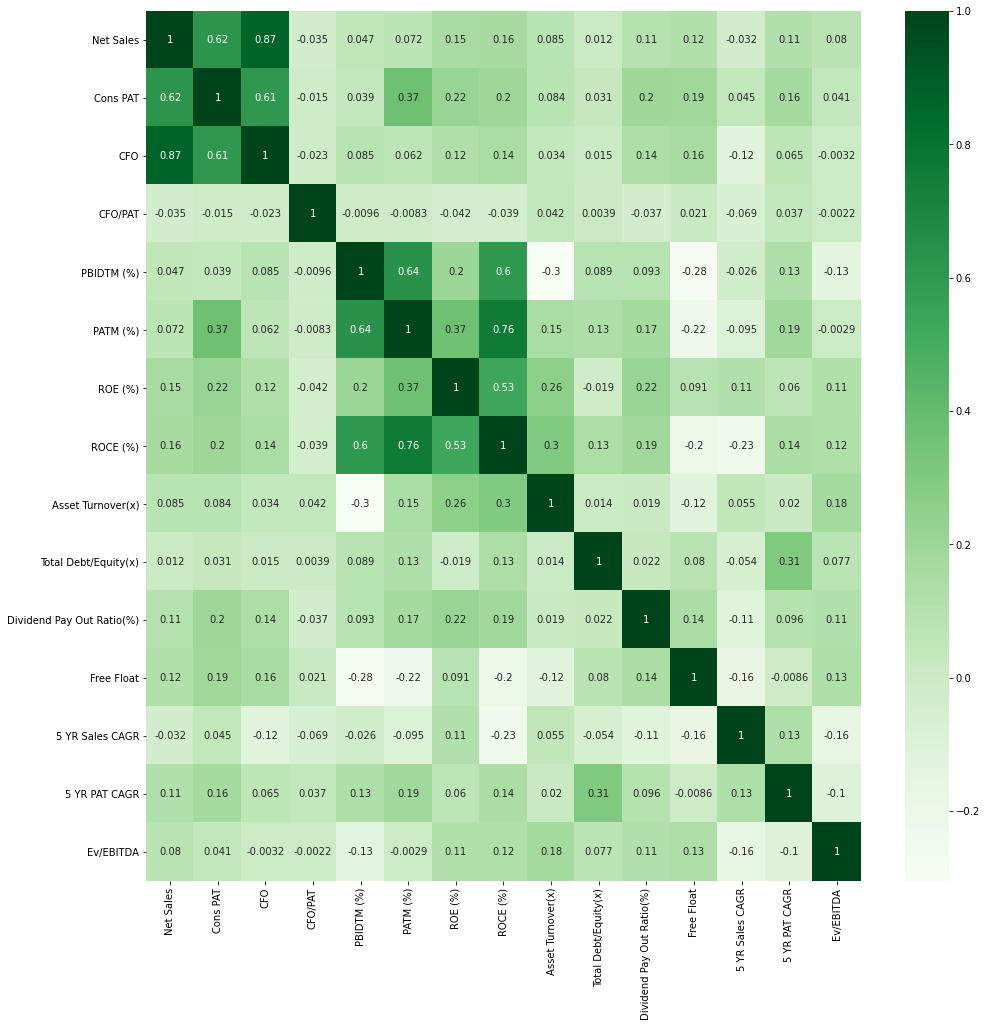

In [47]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

## Selecting most important features:

In [48]:
cor_target = abs(cor["Ev/EBITDA"])
cor_target.sort_values(ascending=False)[:6]
#print(list(cor_target.index))

Ev/EBITDA            1.000000
Asset Turnover(x)    0.176732
5 YR Sales CAGR      0.159697
PBIDTM (%)           0.134104
Free Float           0.125886
ROCE (%)             0.121100
Name: Ev/EBITDA, dtype: float64

In [49]:
X,y = data1[['PBIDTM (%)', 'Asset Turnover(x)', 'ROCE (%)', '5 YR Sales CAGR',
       'Free Float']], data1['Ev/EBITDA']

In [50]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [51]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=5),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR']
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [52]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.10f}'.format(i,r, mean_squared_error(y_test.values, p),))

 0 LassoCV                 173.1843777039
 1 XGBRegressor            227.3576567436
 2 RidgeCV                 177.4865816575
 3 BayesianRidge           153.1326344337
 4 ARDRegression           195.4828378778
 5 ElasticNetCV            164.4975062071
 6 LassoLarsCV             173.1843777039
 7 SVR                     197.0500424950


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [53]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 -0.07726
 1 XGBRegressor            -0.41423
 2 RidgeCV                 -0.10402
 3 BayesianRidge           0.04747
 4 ARDRegression           -0.21596
 5 ElasticNetCV            -0.02322
 6 LassoLarsCV             -0.07726
 7 SVR                     -0.22571


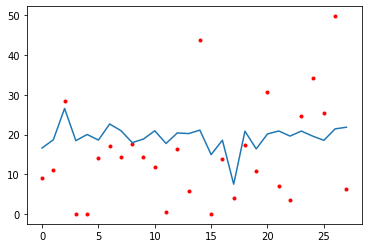

In [54]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[3])

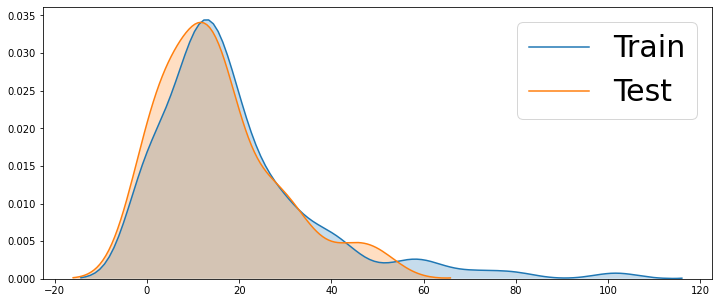

In [55]:
plt.subplots(figsize=(12,5))
sns.kdeplot(y_train, shade=True, label='Train')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})

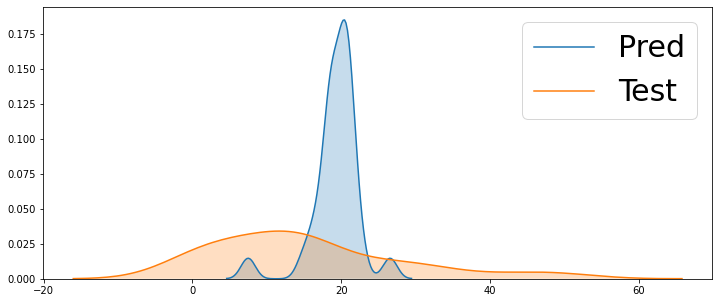

In [56]:
plt.subplots(figsize=(12,5))
sns.kdeplot(pred_list[3], shade=True, label='Pred')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})

# **M/Sales Prediction**

In [57]:
data2 = data.iloc[:,: ].drop('Ev/EBITDA', axis=1)

In [58]:
data2.head()

,Company,Net Sales,Cons PAT,CFO,CFO/PAT,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Dividend Pay Out Ratio(%),Free Float,5 YR Sales CAGR,5 YR PAT CAGR,M/Sales
0,3I Infotech Ltd.,1125.58,-548.96,199.06,-0.36,9.65,-49.02,0.00,-17.58,0.58,-1.03,0.00,73.85,-0.03,-1.72,0.22
1,3M India Ltd.,2139.60,194.76,260.90,1.34,15.93,8.76,21.69,33.53,1.53,0.01,0.00,11.94,0.12,0.53,5.86
2,Aavas Financiers Ltd.,190.88,32.78,-590.80,-18.02,77.60,17.17,21.48,11.96,0.15,7.10,0.00,0.00,0.54,0.67,0.00
3,ABB India Ltd.,8140.27,299.88,381.67,1.27,8.48,3.46,10.30,17.10,0.97,0.20,26.14,14.38,0.01,0.06,3.30
4,Abbott India Ltd.,2614.50,255.25,248.68,0.97,15.69,9.65,23.93,37.55,1.39,0.00,29.14,19.59,0.10,0.18,4.24


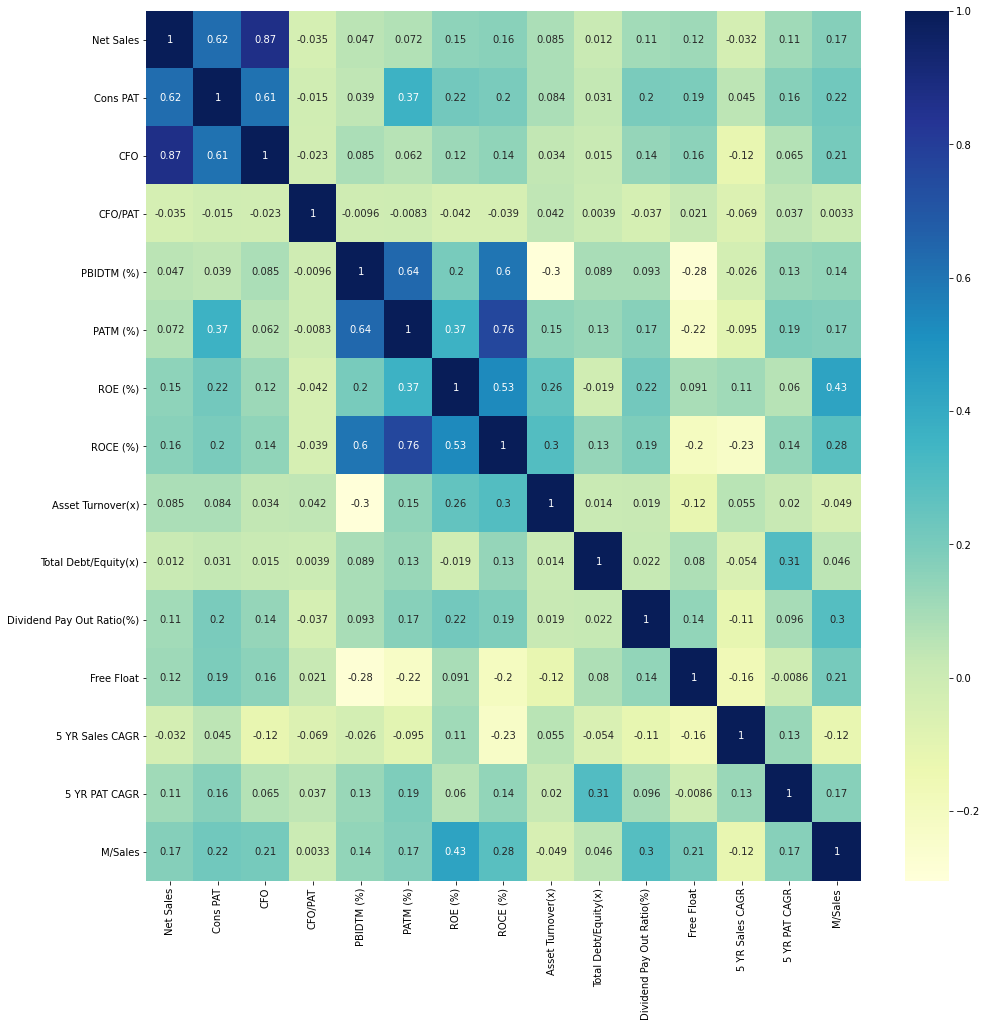

In [59]:
plt.figure(figsize=(16,16))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [60]:
cor_target = abs(cor["M/Sales"])
cor_target.sort_values(ascending=False)[:6]

M/Sales                      1.000000
ROE (%)                      0.431921
Dividend Pay Out Ratio(%)    0.296412
ROCE (%)                     0.284559
Cons PAT                     0.221221
CFO                          0.208535
Name: M/Sales, dtype: float64

In [61]:
X,y = data2[['Dividend Pay Out Ratio(%)', 'CFO', 'ROE (%)', 'ROCE (%)',
       'Cons PAT']], data2['M/Sales']

In [62]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [63]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=10),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR',]
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [64]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, round(mean_squared_error(y_test.values, p)**0.5,5),))

 0 LassoCV                 1.90165
 1 XGBRegressor            1.89840
 2 RidgeCV                 1.76132
 3 BayesianRidge           1.82855
 4 ARDRegression           1.83232
 5 ElasticNetCV            1.89824
 6 LassoLarsCV             2.03234
 7 SVR                     2.03020


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [65]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 0.12214
 1 XGBRegressor            0.12514
 2 RidgeCV                 0.24693
 3 BayesianRidge           0.18834
 4 ARDRegression           0.18499
 5 ElasticNetCV            0.12529
 6 LassoLarsCV             -0.00266
 7 SVR                     -0.00054


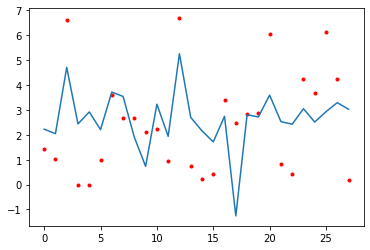

In [66]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[2])

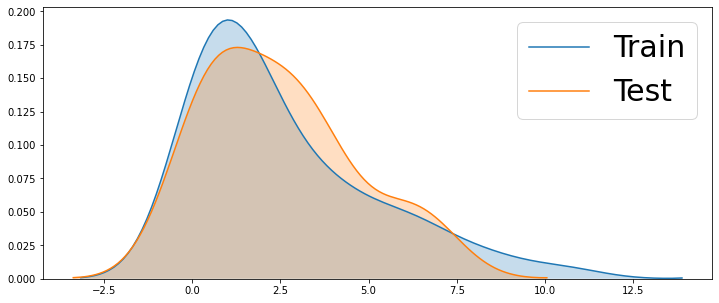

In [67]:
plt.subplots(figsize=(12,5))
sns.kdeplot(y_train, shade=True, label='Train')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})

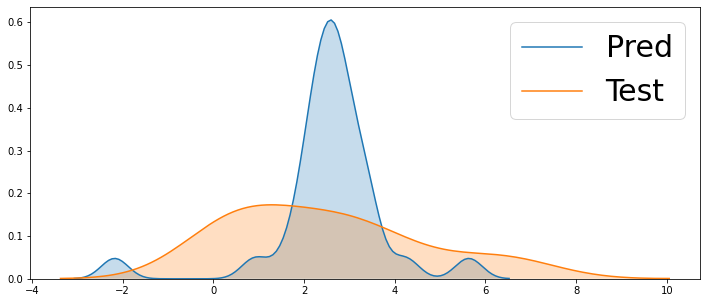

In [68]:

plt.subplots(figsize=(12,5))
sns.kdeplot(pred_list[3], shade=True, label='Pred')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})